In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score


In [3]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [4]:
df = pd.read_csv('Fraud.csv')
df = df.rename(columns={'oldbalanceOrg' :'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', 
                        'oldbalanceDest':'oldBalanceDest', 'newbalanceDest' : 'newBalanceDest'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldBalanceOrig  float64
 5   newBalanceOrig  float64
 6   nameDest        object 
 7   oldBalanceDest  float64
 8   newBalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.head(200)

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
195,1,CASH_OUT,210370.09,C2121995675,0.0,0.00,C1170794006,1442298.03,22190.99,0,0
196,1,CASH_OUT,36437.06,C2120063568,0.0,0.00,C1740000325,154606.00,1363368.51,0,0
197,1,CASH_OUT,82691.56,C1620409359,0.0,0.00,C248609774,657983.89,6453430.91,0,0
198,1,CASH_OUT,338767.10,C691691381,0.0,0.00,C453211571,544481.28,3461666.05,0,0


In [7]:
df.tail(300)

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
6362320,718,CASH_OUT,159188.22,C691808084,3859.00,0.00,C1818183087,0.00,159188.22,0,0
6362321,718,CASH_OUT,186273.84,C102120699,168046.00,0.00,C1515639522,24893.67,211167.51,0,0
6362322,718,TRANSFER,82096.45,C614459560,13492.00,0.00,C855350324,0.00,82096.45,0,0
6362323,718,DEBIT,1864.24,C49652609,20426.00,18561.76,C1799009964,188746.00,190610.24,0,0
6362324,719,TRANSFER,366896.03,C1253782028,366896.03,0.00,C2141598336,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [8]:
df.isnull().values.any()

False

In [9]:
print('fraudulent transaction are {}'.format(list(df.loc[df.isFraud == 1].type.drop_duplicates().values)))

dfFraudTransfer=df.loc[(df.isFraud == 1)&(df.type == 'TRANSFER')]

dfFraudCashout=df.loc[(df.isFraud == 1)&(df.type == 'CASH_OUT')]

print('\nnumber of fraudulent TRANSFERs={}'.format(len(dfFraudTransfer)))

print('\nnumber of fraudulent CASH_OUT={}'.format(len(dfFraudCashout)))

fraudulent transaction are ['TRANSFER', 'CASH_OUT']

number of fraudulent TRANSFERs=4097

number of fraudulent CASH_OUT=4116


In [18]:
CountisFlaggedFraud = df.loc[(df.isFlaggedFraud == 1)]

CountisFlaggedFraudWithTransfer = df.loc[(df.isFlaggedFraud == 1) & (df.type == 'TRANSFER')]

print(len(CountisFlaggedFraud))
print(len(CountisFlaggedFraudWithTransfer))
print(df.shape)
print(CountisFlaggedFraudWithTransfer)

print('\nThe type of transactions in which isFlaggedFraud is set: \{}'.format(list(df.loc[df.isFlaggedFraud == 1].type.drop_duplicates())))

dfTransfer=df.loc[df.type == 'TRANSFER']
dfFlagged=df.loc[df.isFlaggedFraud == 1]
dfNotFlagged=df.loc[df.isFlaggedFraud == 0]

print('\nminimum amount transacted when isFlaggedFraud is set={}'.format(dfFlagged.amount.min()))

print('\nmax amount transacted when isFlaggedFraud is set={}'.format(dfFlagged.amount.max()))

print('\nmax amount is Transfered when isFlaggedFraud is NOT set={}'.format(dfNotFlagged.amount.max()))

16
16
(6362620, 11)
         step      type       amount     nameOrig  oldBalanceOrig  \
2736446   212  TRANSFER   4953893.08   C728984460      4953893.08   
3247297   250  TRANSFER   1343002.08  C1100582606      1343002.08   
3760288   279  TRANSFER    536624.41  C1035541766       536624.41   
5563713   387  TRANSFER   4892193.09   C908544136      4892193.09   
5996407   425  TRANSFER  10000000.00   C689608084     19585040.37   
5996409   425  TRANSFER   9585040.37   C452586515     19585040.37   
6168499   554  TRANSFER   3576297.10   C193696150      3576297.10   
6205439   586  TRANSFER    353874.22  C1684585475       353874.22   
6266413   617  TRANSFER   2542664.27   C786455622      2542664.27   
6281482   646  TRANSFER  10000000.00    C19004745     10399045.08   
6281484   646  TRANSFER    399045.08   C724693370     10399045.08   
6296014   671  TRANSFER   3441041.46   C917414431      3441041.46   
6351225   702  TRANSFER   3171085.59  C1892216157      3171085.59   
6362460   730 

In [19]:
print('\n number of Transfers where isFlaggedFraud = 0, yet oldBalanceDest = 0 and newBalanceDest = 0: {}'.format(len(dfTransfer.loc[(dfTransfer.isFlaggedFraud == 0) & (dfTransfer.oldBalanceDest == 0) & (dfTransfer.newBalanceDest == 0)]))) 


The number of TRANSFERs where isFlaggedFraud = 0, yet oldBalanceDest = 0 and newBalanceDest = 0: 4158


In [20]:
print('\n Min, Max of OldBalanceOrig for isFlaggedFraud = 1 Transfers are : {}'.format([round(dfFlagged.oldBalanceOrig.min()), round(dfFlagged.oldBalanceOrig.max())]))

print('\n Min, Max of oldBalanceOrig of isFlaggedFraud = 0 Transfers where oldBalanceOrig = newBalanceOrig : {}'.format([dfTransfer.loc[(dfTransfer.isFlaggedFraud == 0) 
                                                                                                                                       & (dfTransfer.oldBalanceOrig == dfTransfer.newBalanceOrig)].oldBalanceOrig.min(),
                                                                                                                        round(dfTransfer.loc[(dfTransfer.isFlaggedFraud == 0) & (dfTransfer.oldBalanceOrig == dfTransfer.newBalanceOrig)].oldBalanceOrig.max())]))


 Min, Max of OldBalanceOrig for isFlaggedFraud = 1 Transfers are : [353874, 19585040]

 Min, Max of oldBalanceOrig of isFlaggedFraud = 0 Transfers where oldBalanceOrig = newBalanceOrig : [0.0, 575668]


In [21]:
print('\nHave Originators of transactions flagged as fraud transacted more than once? {}'.format((dfFlagged.nameOrig.isin(pd.concat([dfNotFlagged.nameOrig,dfNotFlagged.nameDest]))).any()))


print('\nHave destinations for transactions flagged as fraud initiated other transactions? {}'.format((dfFlagged.nameDest.isin(dfNotFlagged.nameOrig)).any()))


print('\nHow many destination accounts of transactions as flagged as fraud have been destination accounts more than once?: {}'.format(sum(dfFlagged.nameDest.isin(dfNotFlagged.nameDest))))


Have Originators of transactions flagged as fraud transacted more than once? False

Have destinations for transactions flagged as fraud initiated other transactions? False

How many destination accounts of transactions as flagged as fraud have been destination accounts more than once?: 2


In [22]:
print('\nAre there any merchants among originators accounts for CASH_IN transactions? {}'.format((df.loc[df.type == 'CASH_IN'].nameOrig.str.contains('M')).any()))


Are there any merchants among originators accounts for CASH_IN transactions? False


In [23]:
print('\nAre there any merchants among destination accounts for CASH_OUT transactions? {}'.format((df.loc[df.type == 'CASH_OUT'].nameDest.str.contains('M')).any()))


Are there any merchants among destination accounts for CASH_OUT transactions? False


In [24]:
print('\nAre there are any merchants accounts among any originator accounts?\n{}'.format(df.nameOrig.str.contains('M').any()))
print('\nAre there any transactions having merchants among destination accounts other than the PAYMENT type?\n{}'.format((df.loc[df.nameDest.str.contains('M')].type != 'PAYMENT').any()))


Are there are any merchants accounts among any originator accounts?
False

Are there any transactions having merchants among destination accounts other than the PAYMENT type?
False


In [26]:
print('\nWithin fraudlent transactions, are there destinations for TRANSFERs that are also originators for CASH_OUTs?\n{}'.format((dfFraudTransfer.nameDest.isin(dfFraudCashout.nameOrig)).any()))
dfNotFraud = df.loc[df.isFraud == 0]


Within fraudlent transactions, are there destinations for TRANSFERs that are also originators for CASH_OUTs?
False


In [27]:
print('\nFraudlent TRANSFERs whose destination accounts are originators of genuine CASH_OUTs:\n\n{}'.format(dfFraudTransfer.loc[dfFraudTransfer.nameDest.isin(dfNotFraud.loc[dfNotFraud.type == 'CASH_OUT'].nameOrig.drop_duplicates())]))


Fraudlent TRANSFERs whose destination accounts are originators of genuine CASH_OUTs:

         step      type      amount     nameOrig  oldBalanceOrig  \
1030443    65  TRANSFER  1282971.57  C1175896731      1282971.57   
6039814   486  TRANSFER   214793.32  C2140495649       214793.32   
6362556   738  TRANSFER   814689.88  C2029041842       814689.88   

         newBalanceOrig     nameDest  oldBalanceDest  newBalanceDest  isFraud  \
1030443             0.0  C1714931087             0.0             0.0        1   
6039814             0.0   C423543548             0.0             0.0        1   
6362556             0.0  C1023330867             0.0             0.0        1   

         isFlaggedFraud  
1030443               0  
6039814               0  
6362556               0  


In [28]:
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]
randomState = 5
np.random.seed(randomState)
Y = X['isFraud']
del X['isFraud']
X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1
X.type = X.type.astype(int)

In [29]:
Xfraud = X.loc[Y == 1]
XnonFraud = X.loc[Y == 0]
print('\nThe fraction of fraudulent transactions with \'oldBalanceDest\' = \\'newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(Xfraud.loc[(Xfraud.oldBalanceDest == 0) & \
(Xfraud.newBalanceDest == 0) & (Xfraud.amount)]) / (1.0 * len(Xfraud))))
print('\nThe fraction of genuine transactions with \'oldBalanceDest\' = \newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(XnonFraud.loc[(XnonFraud.oldBalanceDest == 0) & \
(XnonFraud.newBalanceDest == 0) & (XnonFraud.amount)]) / (1.0 * len(XnonFraud))))


The fraction of fraudulent transactions with 'oldBalanceDest' = 'newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.4955558261293072

The fraction of genuine transactions with 'oldBalanceDest' = newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.0006176245277308345


In [30]:
X.loc[(X.oldBalanceDest == 0) & (X.newBalanceDest == 0) & (X.amount != 0), ['oldBalanceDest', 'newBalanceDest']] = - 1

In [31]:
X['errorBalanceOrig'] = X.newBalanceOrig + X.amount - X.oldBalanceOrig
X['errorBalanceDest'] = X.oldBalanceDest + X.amount - X.newBalanceDest

In [32]:
limit = len(X)

def plotStrip(x, y, hue, figsize = (14, 9)):
    
    fig = plt.figure(figsize = figsize)
    colours = plt.cm.tab10(np.linspace(0, 1, 9))
    with sns.axes_style('ticks'):
        ax = sns.stripplot(x, y, 
             hue = hue, jitter = 0.4, marker = '.', 
             size = 4, palette = colours)
        ax.set_xlabel('')
        ax.set_xticklabels(['genuine', 'fraudulent'], size = 16)
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)

        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles, ['Transfer', 'Cash out'], bbox_to_anchor=(1, 1), 
               loc=2, borderaxespad=0, fontsize = 16);
    return ax

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:
C:\Users\Shravya Miriyanam\AppData\Local\Temp\ipykernel_15536\2841039611.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['genuine', 'fraudulent'], size=16)


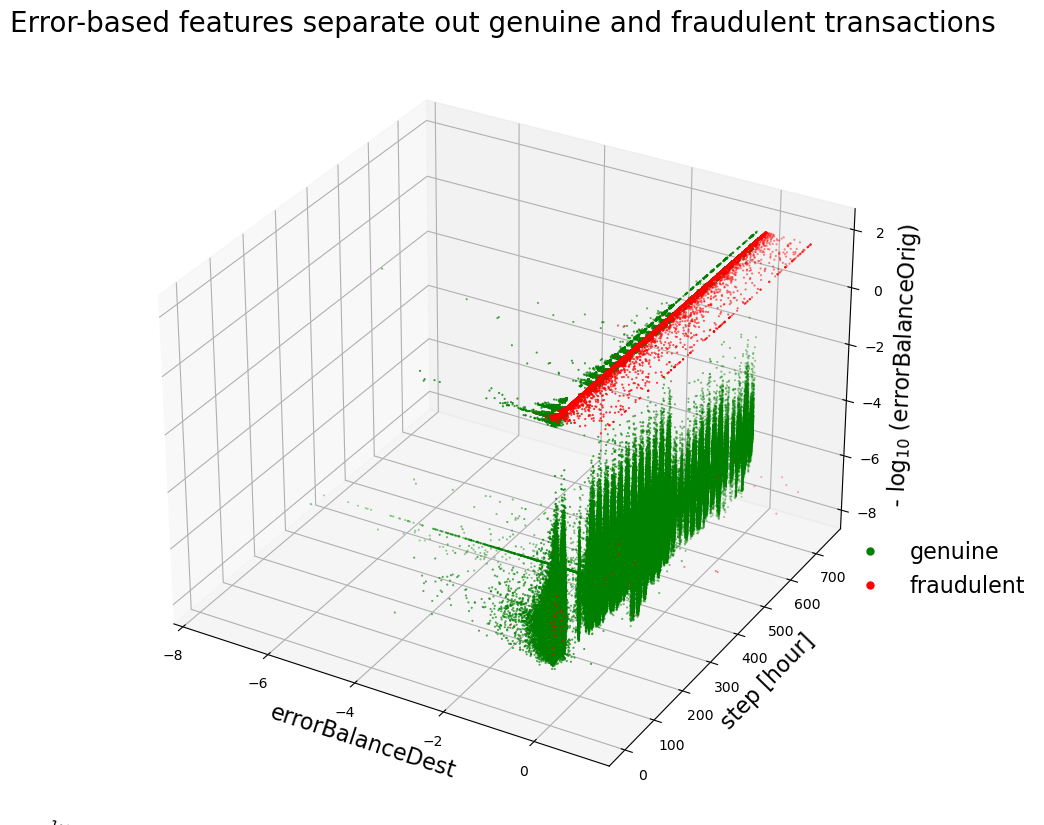

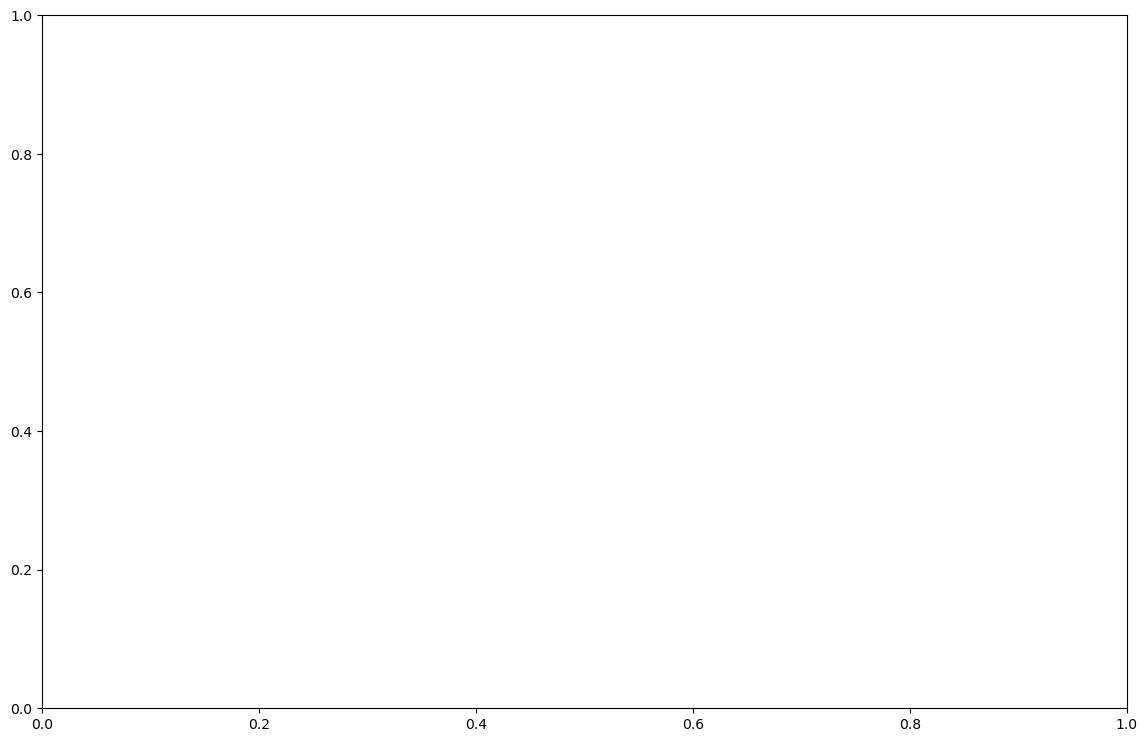

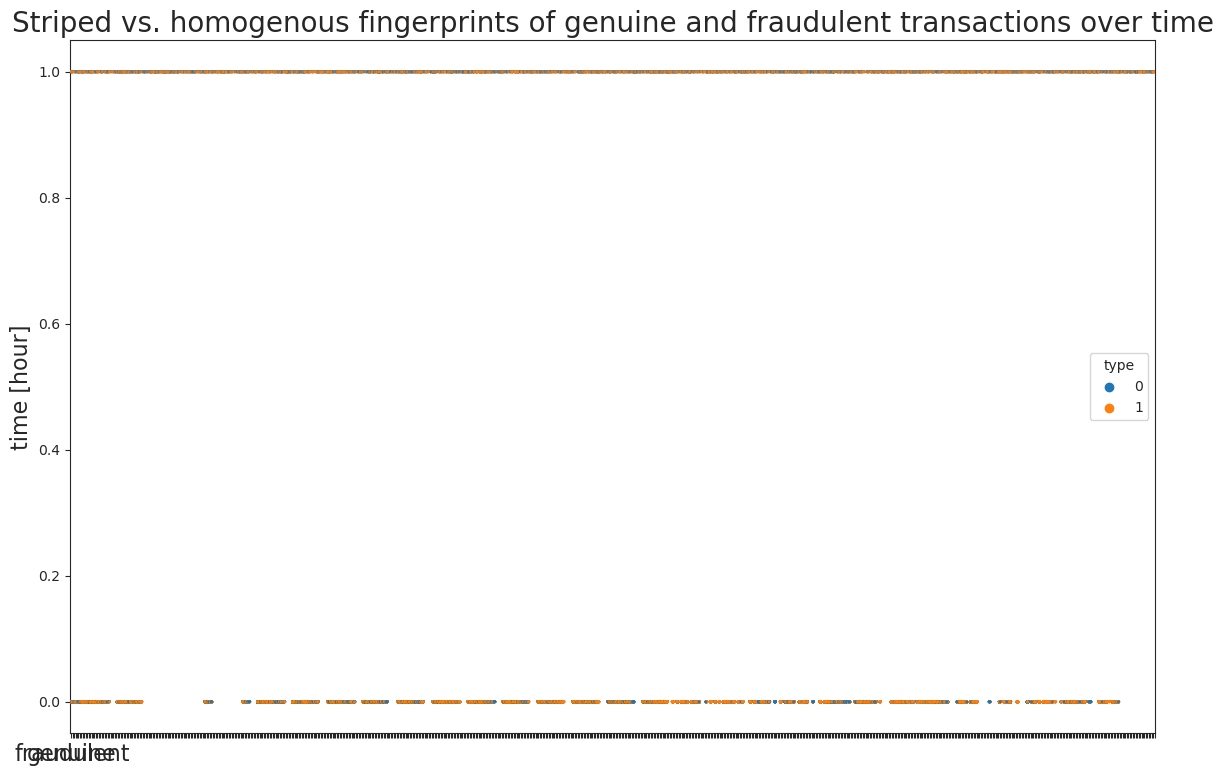

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotStrip(x, y, hue, figsize=(14, 9)):
    plt.figure(figsize=figsize)
    colours = plt.cm.tab10(np.linspace(0, 1, 9))
    with sns.axes_style('ticks'):
        ax = sns.stripplot(x=x, y=y, hue=hue, jitter=0.4, marker='.', size=4, palette=colours)
        ax.set_xlabel('')
        ax.set_xticklabels(['genuine', 'fraudulent'], size=16)
        return ax
ax = plotStrip(X.step[:limit], Y[:limit], X.type[:limit])
ax.set_ylabel('time [hour]', size=16)
ax.set_title('Striped vs. homogenous fingerprints of genuine and fraudulent transactions over time', size=20)
plt.show()


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:
C:\Users\Shravya Miriyanam\AppData\Local\Temp\ipykernel_15536\3778877965.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['genuine', 'fraudulent'], size=16)


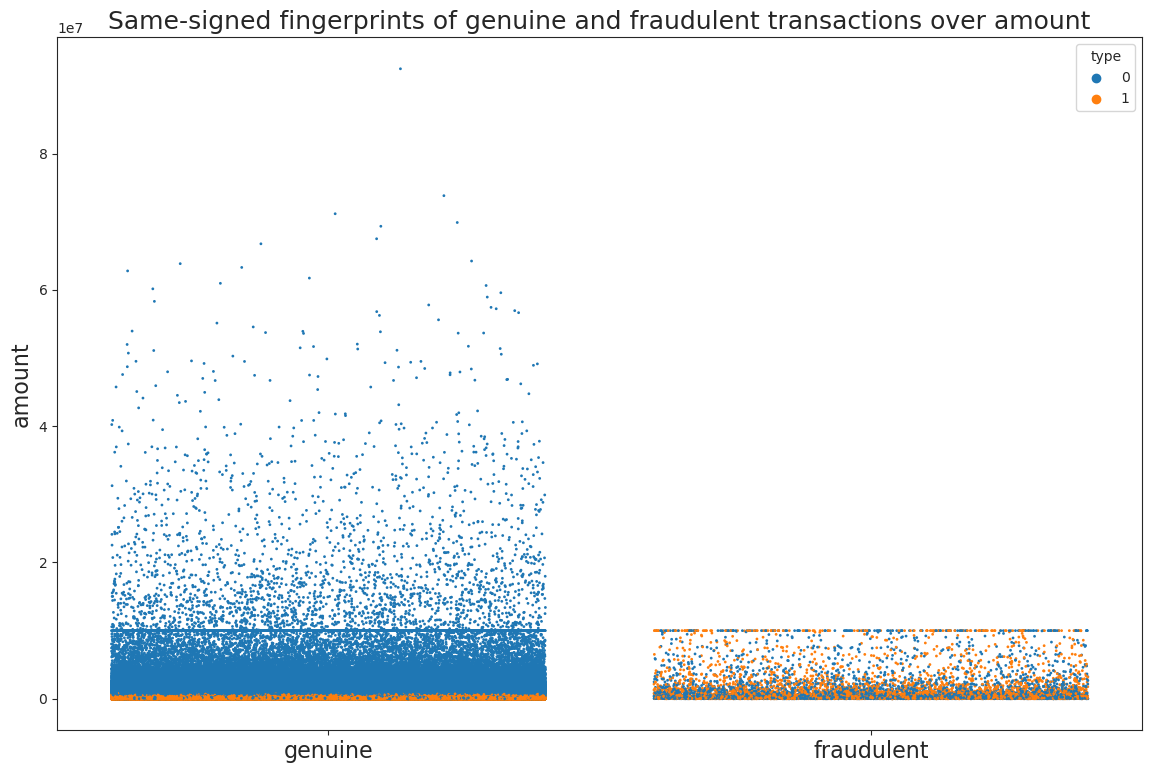

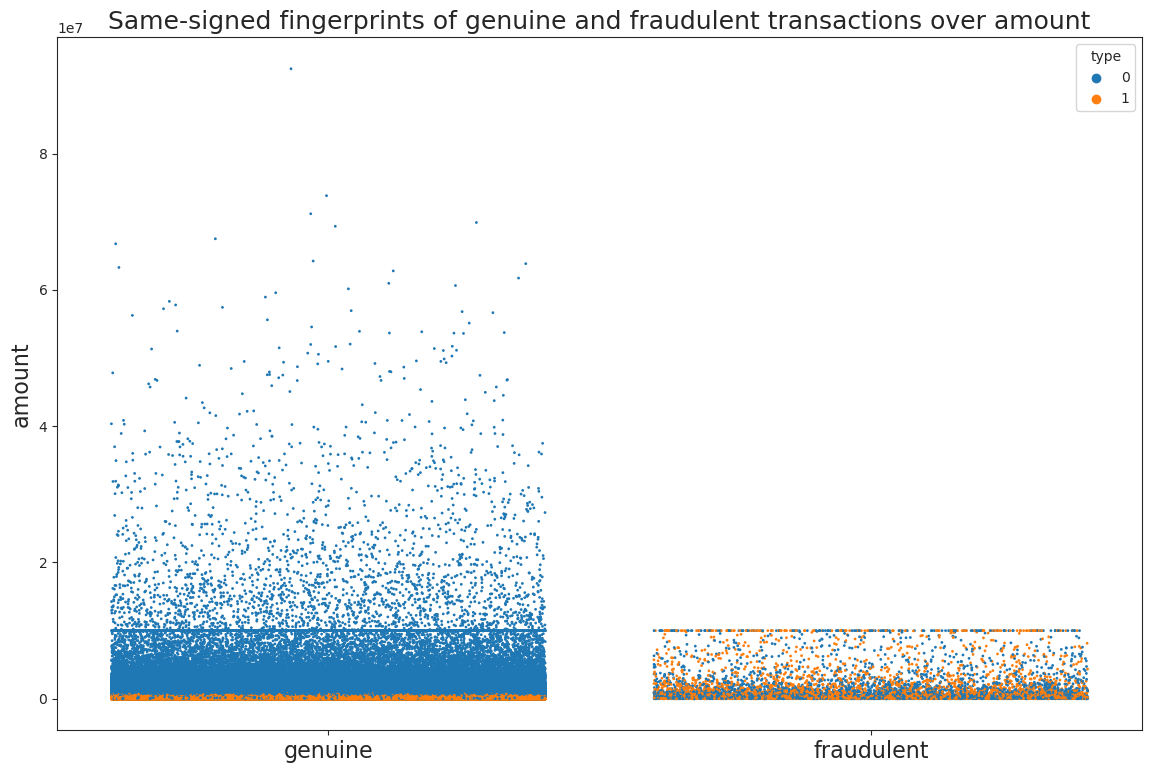

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
def plotStrip(x, y, hue, figsize=(14, 9)):
    plt.figure(figsize=figsize)
    colours = plt.cm.tab10(np.linspace(0, 1, 9))
    with sns.axes_style('ticks'):
        ax = sns.stripplot(x=x, y=y, hue=hue, jitter=0.4, marker='.', size=4, palette=colours)
        ax.set_xlabel('')
        ax.set_xticklabels(['genuine', 'fraudulent'], size=16)
        return ax
limit = len(X)
ax = plotStrip(Y[:limit], X.amount[:limit], X['type'][:limit], figsize=(14, 9))
ax.set_ylabel('amount', size=16)
ax.set_title('Same-signed fingerprints of genuine and fraudulent transactions over amount', size=18)
plt.show()


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:
C:\Users\Shravya Miriyanam\AppData\Local\Temp\ipykernel_15536\1415574227.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['genuine', 'fraudulent'], size=16)


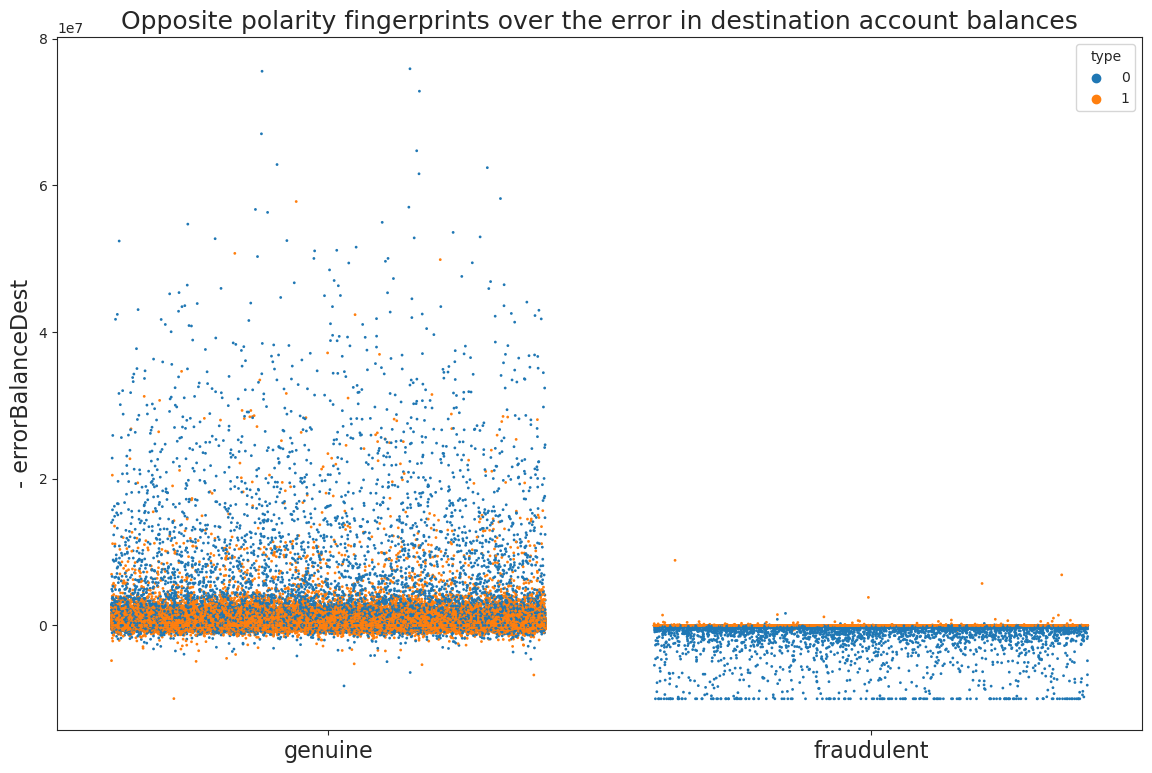

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
def plotStrip(x, y, hue, figsize=(14, 9)):
    plt.figure(figsize=figsize)
    colours = plt.cm.tab10(np.linspace(0, 1, 9))
    with sns.axes_style('ticks'):
        ax = sns.stripplot(x=x, y=y, hue=hue, jitter=0.4, marker='.', size=4, palette=colours)
        ax.set_xlabel('')
        ax.set_xticklabels(['genuine', 'fraudulent'], size=16)
        return ax
limit = len(X)
ax = plotStrip(Y[:limit], -X.errorBalanceDest[:limit], X['type'][:limit], figsize=(14, 9))
ax.set_ylabel('- errorBalanceDest', size=16)
ax.set_title('Opposite polarity fingerprints over the error in destination account balances', size=18)
plt.show()


In [36]:
#long computatuiton time (copied code)
x = 'errorBalanceDest'
y = 'step'
z = 'errorBalanceOrig'
zOffset = 0.02
limit = len(X)
sns.reset_orig() 
fig = plt.figure(figsize = (10, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.loc[Y == 0, x][:limit], X.loc[Y == 0, y][:limit], \
  -np.log10(X.loc[Y == 0, z][:limit] + zOffset), c = 'g', marker = '.', \
  s = 1, label = 'genuine')
    ax.scatter(X.loc[Y == 1, x][:limit], X.loc[Y == 1, y][:limit], \
  -np.log10(X.loc[Y == 1, z][:limit] + zOffset), c = 'r', marker = '.', \
  s = 1, label = 'fraudulent')
ax.set_xlabel(x, size = 16); 
ax.set_ylabel(y + ' [hour]', size = 16); 
ax.set_zlabel('- log$_{10}$ (' + z + ')', size = 16)
ax.set_title('Error-based features separate out genuine and fraudulent \
transactions', size = 20)
plt.axis('tight')
ax.grid(1)
noFraudMarker = mlines.Line2D([], [], linewidth = 0, color='g', marker='.',markersize = 10, label='genuine')
fraudMarker = mlines.Line2D([], [], linewidth = 0, color='r', marker='.',markersize = 10, label='fraudulent')
plt.legend(handles = [noFraudMarker, fraudMarker], \bbox_to_anchor = (1.20, 0.38 ), frameon = False, prop={'size': 16});

In [37]:
print('skew = {}'.format( len(Xfraud) / float(len(X)) ))

skew = 0.002964544224336551


In [38]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2,random_state = randomState)

In [50]:
pip install xgboost



  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 640.0 kB/s eta 0:02:36
   ---------------------------------------- 0.2/99.8 MB 1.6 MB/s eta 0:01:01
   ---------------------------------------- 0.9/99.8 MB 7.4 MB/s eta 0:00:14
    --------------------------------------- 1.7/99.8 MB 10.7 MB/s eta 0:00:10
    --------------------------------------- 1.7/99.8 MB 9.1 MB/s eta 0:00:11
    --------------------------------------- 2.1/99.8 MB 9.0 MB/s eta 0:00:11
    --------------------------------------- 2.4/99.8 MB 8.1 MB/s eta 0:00:12
   - -------------------------------------- 2.6/99.8 MB 8.0 MB/s eta 0:00:13
   - ------------------------------

In [51]:
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score
weights = (Y == 0).sum() / (1.0 * (Y == 1).sum())
clf = XGBClassifier(max_depth=3, scale_pos_weight=weights, n_jobs=4)
probabilities = clf.fit(trainX, trainY).predict_proba(testX)
auprc = average_precision_score(testY, probabilities[:, 1])
print('AUPRC = {}'.format(auprc))


AUPRC = 0.9904318801798674


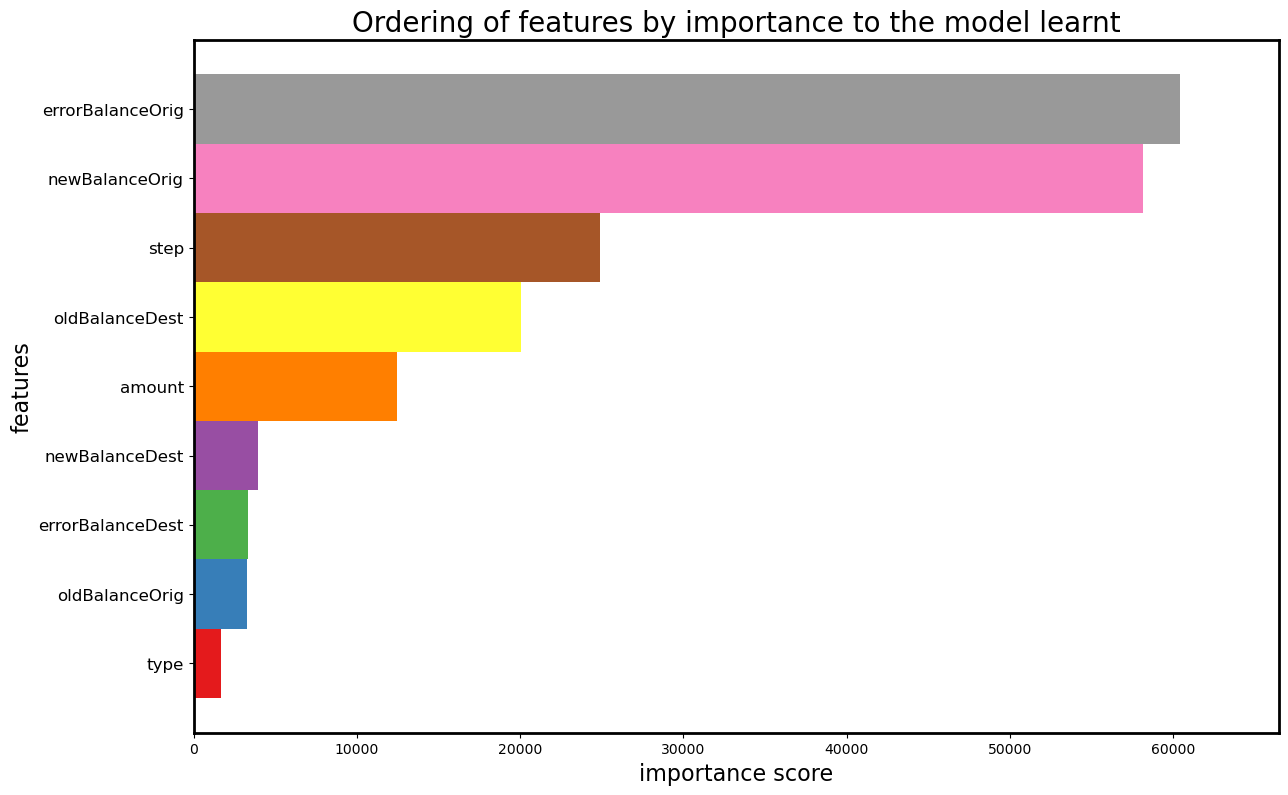

In [52]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111)
colours = plt.cm.Set1(np.linspace(0, 1, 9))
plot_importance(clf, height=1, color=colours, grid=False,show_values=False, importance_type='cover', ax=ax)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)
        ax.set_xlabel('importance score', size=16)
ax.set_ylabel('features', size=16)
ax.set_yticklabels(ax.get_yticklabels(), size=12)
ax.set_title('Ordering of features by importance to the model learnt', size=20)

plt.show()


In [53]:
trainSizes, trainScores, crossValScores = learning_curve(\XGBClassifier(max_depth = 3, scale_pos_weight = weights, n_jobs = 4), trainX,\trainY, scoring = 'average_precision')

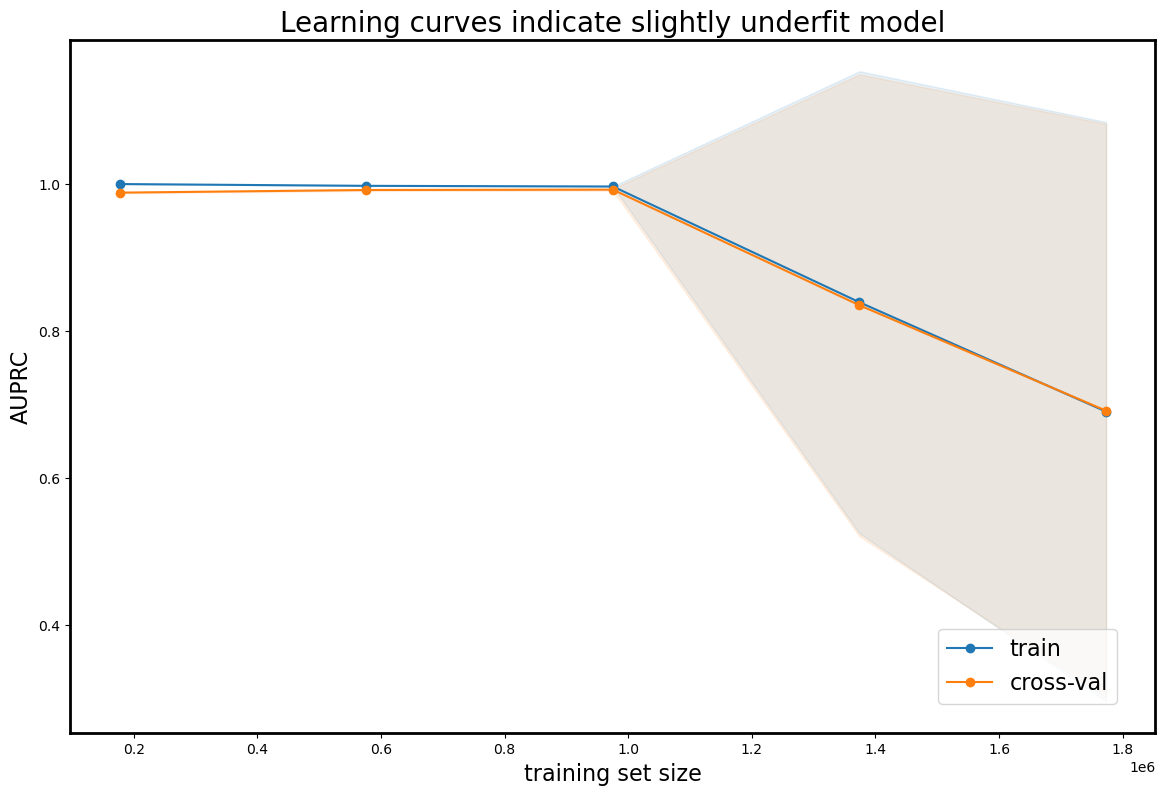

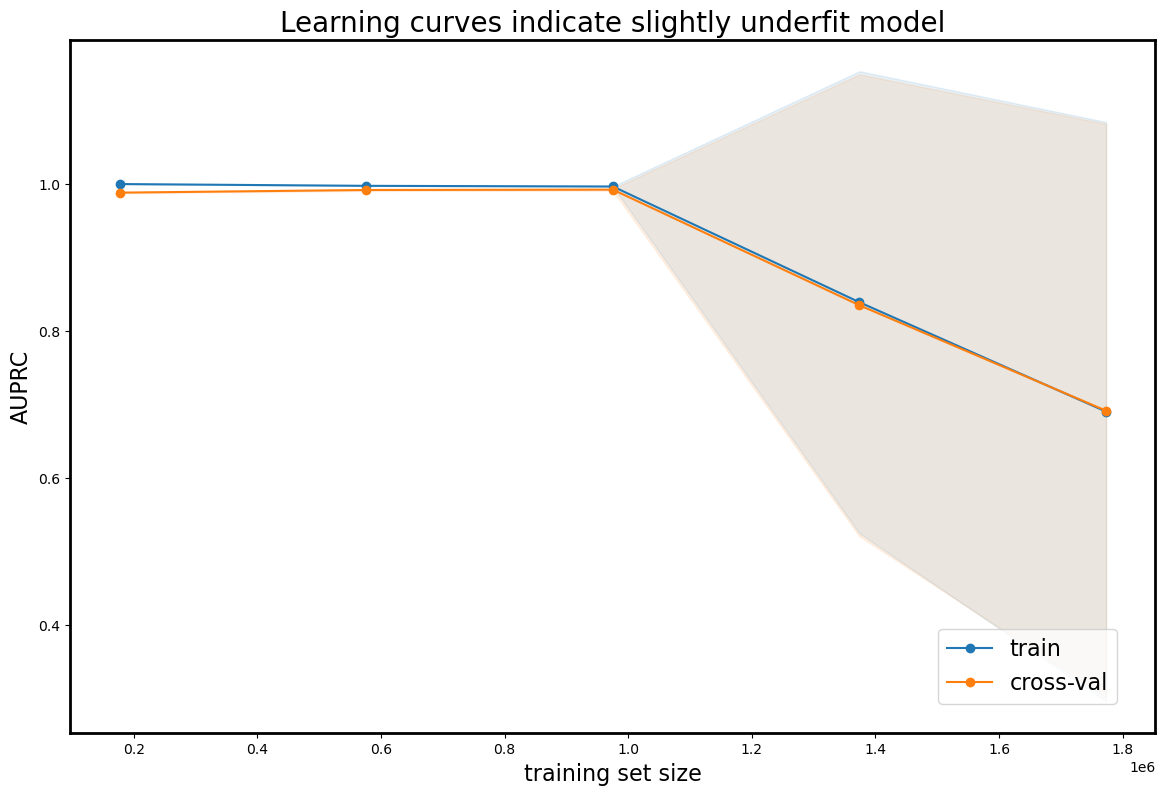

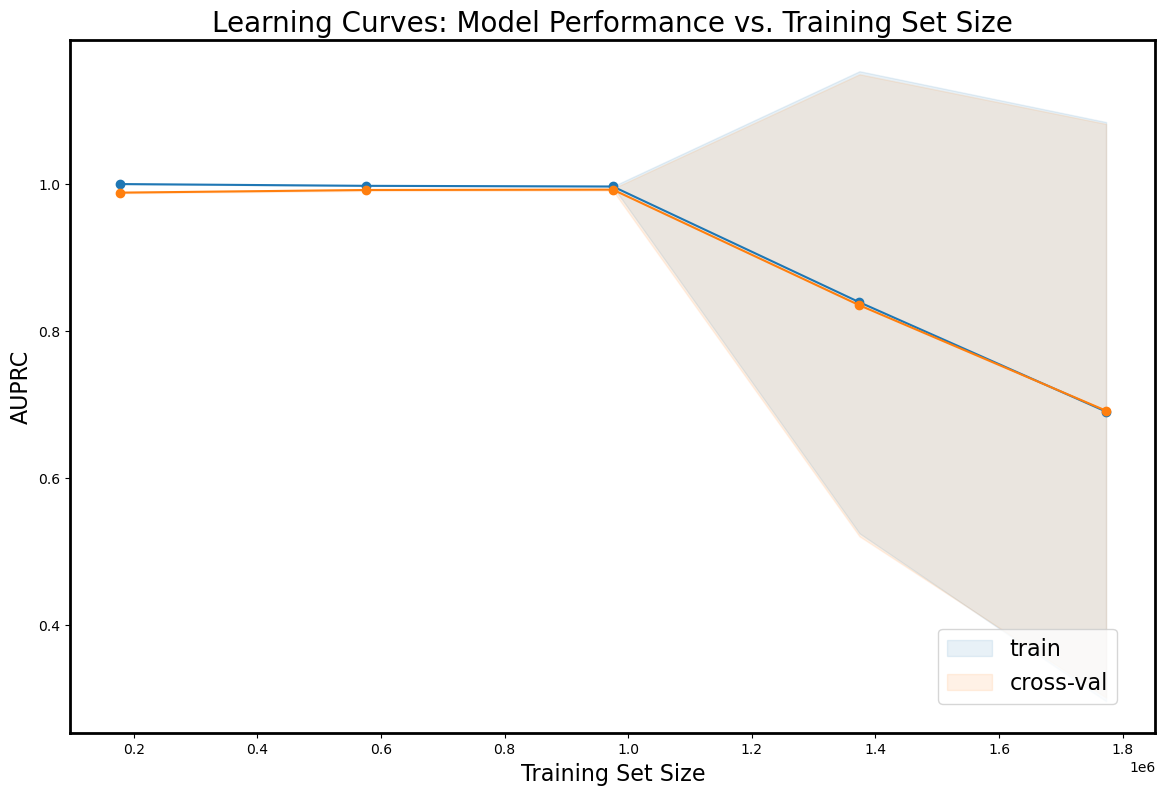

In [56]:
import numpy as np
import matplotlib.pyplot as plt
trainScoresMean = np.mean(trainScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
crossValScoresMean = np.mean(crossValScores, axis=1)
crossValScoresStd = np.std(crossValScores, axis=1)
colours = plt.cm.tab10(np.linspace(0, 1, 9))
fig, ax = plt.subplots(figsize=(14, 9))
ax.fill_between(trainSizes, trainScoresMean - trainScoresStd,
                trainScoresMean + trainScoresStd, alpha=0.1, color=colours[0])
ax.fill_between(trainSizes, crossValScoresMean - crossValScoresStd,
                crossValScoresMean + crossValScoresStd, alpha=0.1, color=colours[1])
ax.plot(trainSizes, trainScoresMean, 'o-', label='train', color=colours[0])
ax.plot(trainSizes, crossValScoresMean, 'o-', label='cross-val', color=colours[1])
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.legend(['train', 'cross-val'], bbox_to_anchor=(0.8, 0.15), loc=2, borderaxespad=0, fontsize=16)
ax.set_xlabel('Training Set Size', size=16)
ax.set_ylabel('AUPRC', size=16)
ax.set_title('Learning Curves: Model Performance vs. Training Set Size', size=20)
plt.show()
